**Exploratory Data Analysis**

## Importing Libraries

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler


## Loading the dataset

In [ ]:
#Loading the dataset and saving it as dataframes
customers=pd.read_csv('Customers.csv')
products=pd.read_csv('Products.csv')
transactions=pd.read_csv('Transactions.csv')

## Inspecting the dataset

In [ ]:
#Shape of dataframes
print(f'Customers dataframe has {customers.shape[0]} rows and {customers.shape[1]} columns.')
print(f'Products dataframe has {products.shape[0]} rows and {products.shape[1]} columns.')
print(f'Transactions dataframe has {transactions.shape[0]} rows and {transactions.shape[1]} columns.')

Customers dataframe has 200 rows and 4 columns.
Products dataframe has 100 rows and 4 columns.
Transactions dataframe has 1000 rows and 7 columns.


In [ ]:
#columns in the dataframes
print(f'Customers columns: {customers.columns}')
print(f'Products columns: {products.columns}')
print(f'Transactions columns: {transactions.columns}')

Customers columns: Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Products columns: Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Transactions columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [ ]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [ ]:
print("Number of customers:", customers['CustomerID'].nunique() )
print('Number of continents: ',customers['Region'].nunique())
print("Number of transactions: ", transactions['TransactionID'].nunique())
print("Number of products : ",products['ProductID'].nunique())

Number of customers: 200
Number of continents:  4
Number of transactions:  1000
Number of products :  100


## Duplicate Analysis

In [ ]:
#checking for duplicate records
print(f'Customers- Duplicate records: {customers.duplicated().sum()}')
print(f'Products- Duplicate records: {products.duplicated().sum()}')
print(f'Transactions- Duplicate records: {transactions.duplicated().sum()}')

Customers- Duplicate records: 0
Products- Duplicate records: 0
Transactions- Duplicate records: 0


There are no duplicate rows present in the dataframes.

## Handling missing data

In [ ]:
#checking for missing data
print(f'Customers dataset: \n{customers.isna().sum()}\n')
print(f'Products dataset: \n{products.isna().sum()}\n')
print(f'Transactions dataset: \n{transactions.isna().sum()}')

Customers dataset: 
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products dataset: 
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions dataset: 
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


There are no missing values present in any of the dataframes

## Checking data type consistency

Converting the SIgnupDate column to datetime data type.

In [ ]:
customers['SignupDate']=pd.to_datetime(customers['SignupDate'])
print(f"after conversion data type: {customers['SignupDate'].dtype}")

after conversion data type: datetime64[ns]


Splitting the Transactiondate column into Transactiondate and TransactionTime columns

In [ ]:
transactions[['TransactionDate', 'TransactionTime']] = transactions['TransactionDate'].str.split(' ', n=1, expand=True)
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,TransactionTime
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,12:38:23
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,22:23:54
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,07:38:55
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,22:55:37
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,15:10:10


Converting transaction date and time columns to date-time format

In [ ]:
transactions['TransactionDate']=pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionTime']=pd.to_datetime(transactions['TransactionTime'])
print(f"after conversion data type of transactiondate: {customers['SignupDate'].dtype}")
print(f"after conversion data type transactiontime: {transactions['TransactionTime'].dtype}")

after conversion data type of transactiondate: datetime64[ns]
after conversion data type transactiontime: datetime64[ns]


<ipython-input-64-3b8611d3bceb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transactions['TransactionTime']=pd.to_datetime(transactions['TransactionTime'])


Checking whether all the CustomerIDs present in the transactions table exists in the customers table

In [ ]:
customer_id_mismatch=transactions['CustomerID'].isin(customers['CustomerID'])
print(~customer_id_mismatch.any())

False


'False' implies that all the CustomerIDs are consistent in both the tables.

Checking whether all the ProductIDs present in the transactions table exists in the products table

In [ ]:
product_id_mismatch=transactions['ProductID'].isin(products['ProductID'])
print(~product_id_mismatch.any())

False


'False' implies that all the ProductIDs are consistent in both the tables.

## Descriptive Statistics

In [ ]:
continent_mapping = {
    'North America': 'North America',
    'South America': 'South America',
    'Europe': 'Europe',
    'Asia': 'Asia'}

customers['Continent'] = customers['Region'].map(continent_mapping)
continent_counts = customers['Continent'].value_counts()
continent_percentages = (continent_counts / len(customers)) * 100
print(continent_percentages)


Continent
South America    29.5
Europe           25.0
North America    23.0
Asia             22.5
Name: count, dtype: float64


In [ ]:
customers.describe()

,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


The dataset contains signup details from Jan 2022 to Dec 2024

In [ ]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


The minimum price of a product is 16 and maximum is 497, with an average of 267

In [ ]:
transactions.describe()

,TransactionDate,Quantity,TotalValue,Price,TransactionTime
count,1000,1000.000000,1000.000000,1000.00000,1000
mean,2024-06-23 03:23:02.399999744,2.537000,689.995560,272.55407,2025-01-26 12:10:00.369000192
min,2023-12-30 00:00:00,1.000000,16.080000,16.08000,2025-01-26 00:00:01
25%,2024-03-25 18:00:00,2.000000,295.295000,147.95000,2025-01-26 06:11:06.500000
50%,2024-06-26 00:00:00,3.000000,588.880000,299.93000,2025-01-26 12:17:11.500000
75%,2024-09-19 00:00:00,4.000000,1011.660000,404.40000,2025-01-26 18:00:06.500000
max,2024-12-28 00:00:00,4.000000,1991.040000,497.76000,2025-01-26 23:59:14
std,NaN,1.117981,493.144478,140.73639,NaN


There are transaction details spanning from dec 2023 to dec 2024.

* The minimum quantity bought is 1 and maximum is 4 with an average of 2.5 units.
* As for the total amount spend, the minimum is 16 and maximum 1991, with an average of 689.
* The average price of a product is 272.

## Correlation Analysis

In [ ]:
transactions_num_columns=transactions.select_dtypes(include=['number'])
print(transactions_num_columns.columns)

Index(['Quantity', 'TotalValue', 'Price'], dtype='object')


<Axes: >

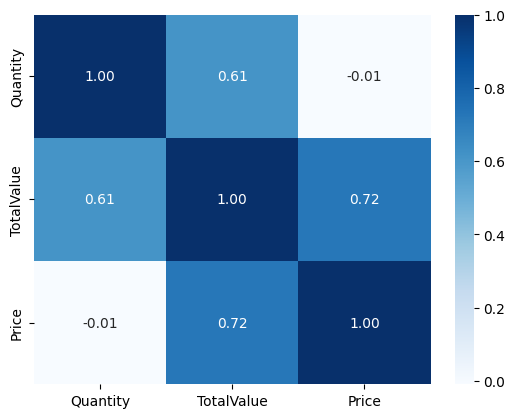

In [ ]:
tr_corr_matrix=transactions_num_columns.corr()
sns.heatmap(tr_corr_matrix, annot=True, cmap='Blues',fmt='.2f')

TotalValue is influenced by Quantity and Price

## Merging datasets

In [ ]:
merged_df=transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
merged_df=merged_df.drop('Price_y', axis=1)
merged_df.rename(columns={'Price_x': 'Price'}, inplace=True)
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,TransactionTime,CustomerName,Region,SignupDate,Continent,ProductName,Category
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,2025-01-26 12:38:23,Andrea Jenkins,Europe,2022-12-03,Europe,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,2025-01-26 22:23:54,Brittany Harvey,Asia,2024-09-04,Asia,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,2025-01-26 07:38:55,Kathryn Stevens,Europe,2024-04-04,Europe,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,2025-01-26 22:55:37,Travis Campbell,South America,2024-04-11,South America,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,2025-01-26 15:10:10,Timothy Perez,Europe,2022-03-15,Europe,ComfortLiving Bluetooth Speaker,Electronics


## Region analysis

<ipython-input-74-b9b665c61115>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df,x='Region',palette='viridis')


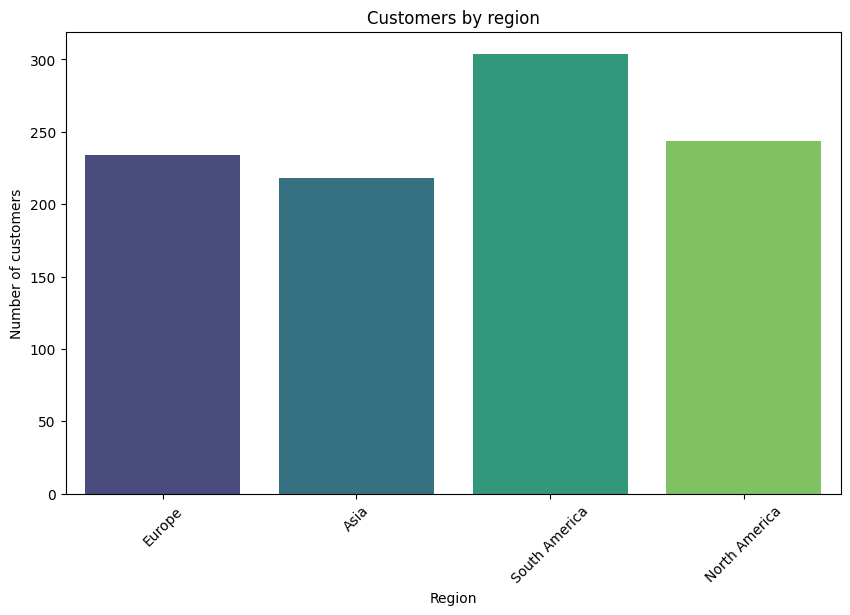

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df,x='Region',palette='viridis')
plt.title('Customers by region')
plt.xlabel('Region')
plt.ylabel('Number of customers')
plt.xticks(rotation=45)
plt.show()

## Signups - Over time analysis

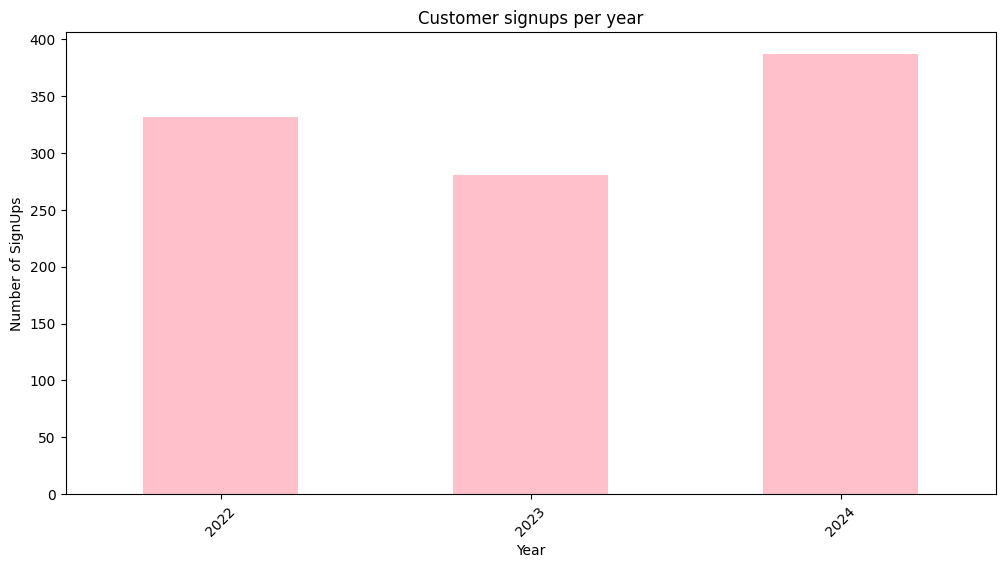

In [ ]:
plt.figure(figsize=(12,6))
merged_df['SignupDate'].dt.year.value_counts().sort_index().plot(kind='bar',color='pink')
plt.title('Customer signups per year')
plt.xlabel('Year')
plt.ylabel('Number of SignUps')
plt.xticks(rotation=45)
plt.show()

<ipython-input-76-d12a253c79c4>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  customers_new=merged_df.resample('Y',on='SignupDate')['CustomerID'].count()


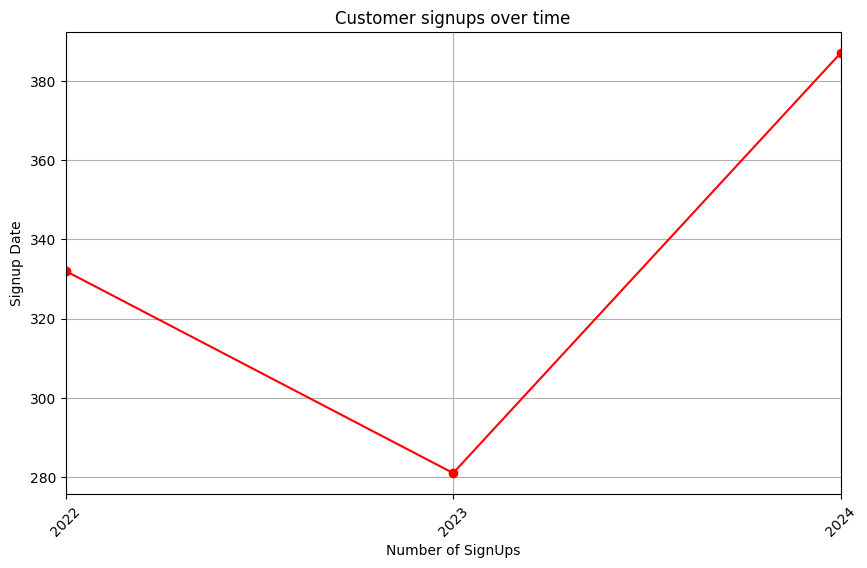

In [ ]:
customers_new=merged_df.resample('Y',on='SignupDate')['CustomerID'].count()
plt.figure(figsize=(10,6))
customers_new.plot(marker='o', linestyle='-', color='red')
plt.title('Customer signups over time')
plt.ylabel('Signup Date')
plt.xlabel('Number of SignUps')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


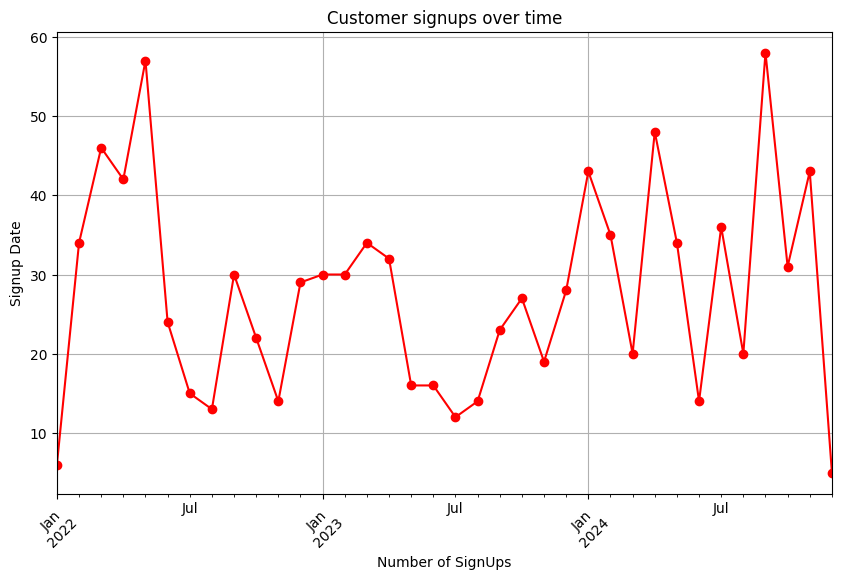

In [ ]:
customers_new=merged_df.resample('ME',on='SignupDate')['CustomerID'].count()
plt.figure(figsize=(10,6))
customers_new.plot(marker='o', linestyle='-', color='red')
plt.title('Customer signups over time')
plt.ylabel('Signup Date')
plt.xlabel('Number of SignUps')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Signup - Region and Time analysis

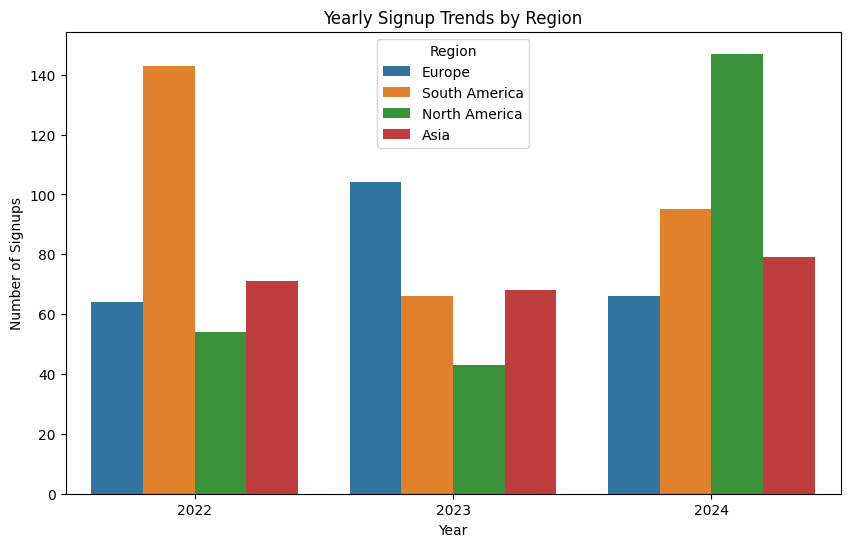

In [ ]:
# Year-wise analysis
x_new=merged_df['SignupDate'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x=x_new, hue='Region', data=merged_df)
plt.title('Yearly Signup Trends by Region')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.legend(title='Region')
plt.show()

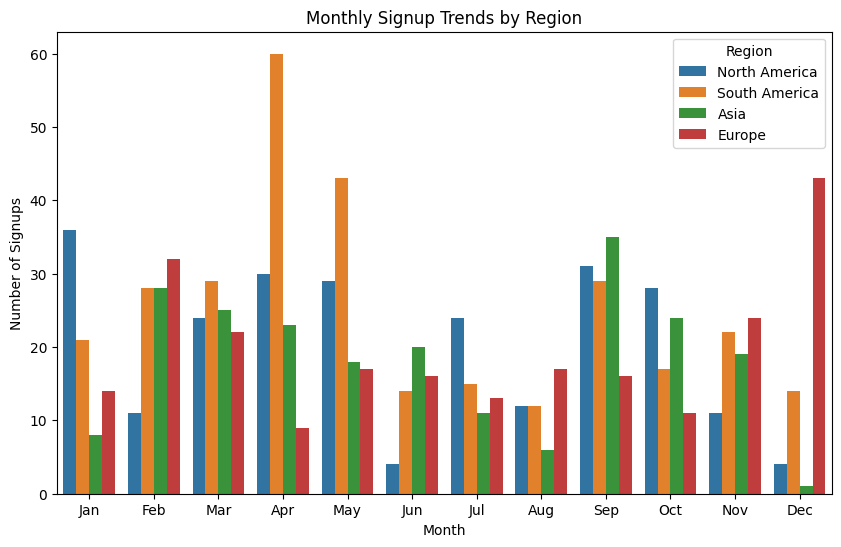

In [ ]:
# Month-wise analysis
x_new=y_new=merged_df['SignupDate'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x=x_new, hue='Region', data=merged_df)
plt.title('Monthly Signup Trends by Region')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(ticks=range(0,12),labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Region')
plt.show()

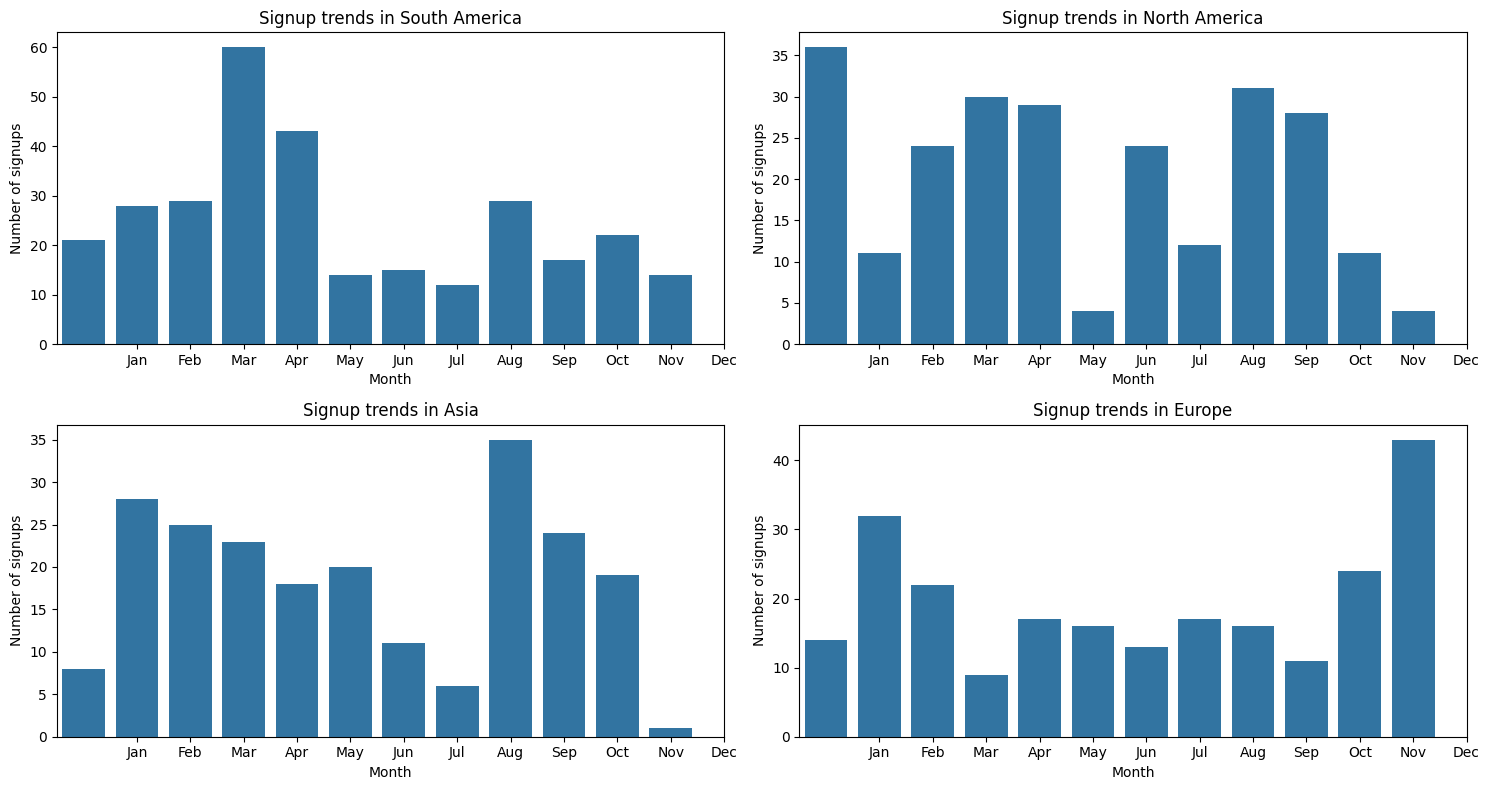

In [ ]:
# Continent-wise analysis
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
continents=['South America', 'North America','Asia','Europe']
for i, continent in enumerate(continents):
  row=i // 2
  col= i % 2
  ax=axes[row,col]

  continent_data=merged_df.loc[merged_df['Region'] == continent]
  x_month=continent_data['SignupDate'].dt.month
  sns.countplot(x=x_month,data=merged_df,ax=ax)
  ax.set_title(f'Signup trends in {continent}')
  ax.set_xlabel('Month')
  ax.set_ylabel('Number of signups')
  ax.set_xticks(range(1,13))
  ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

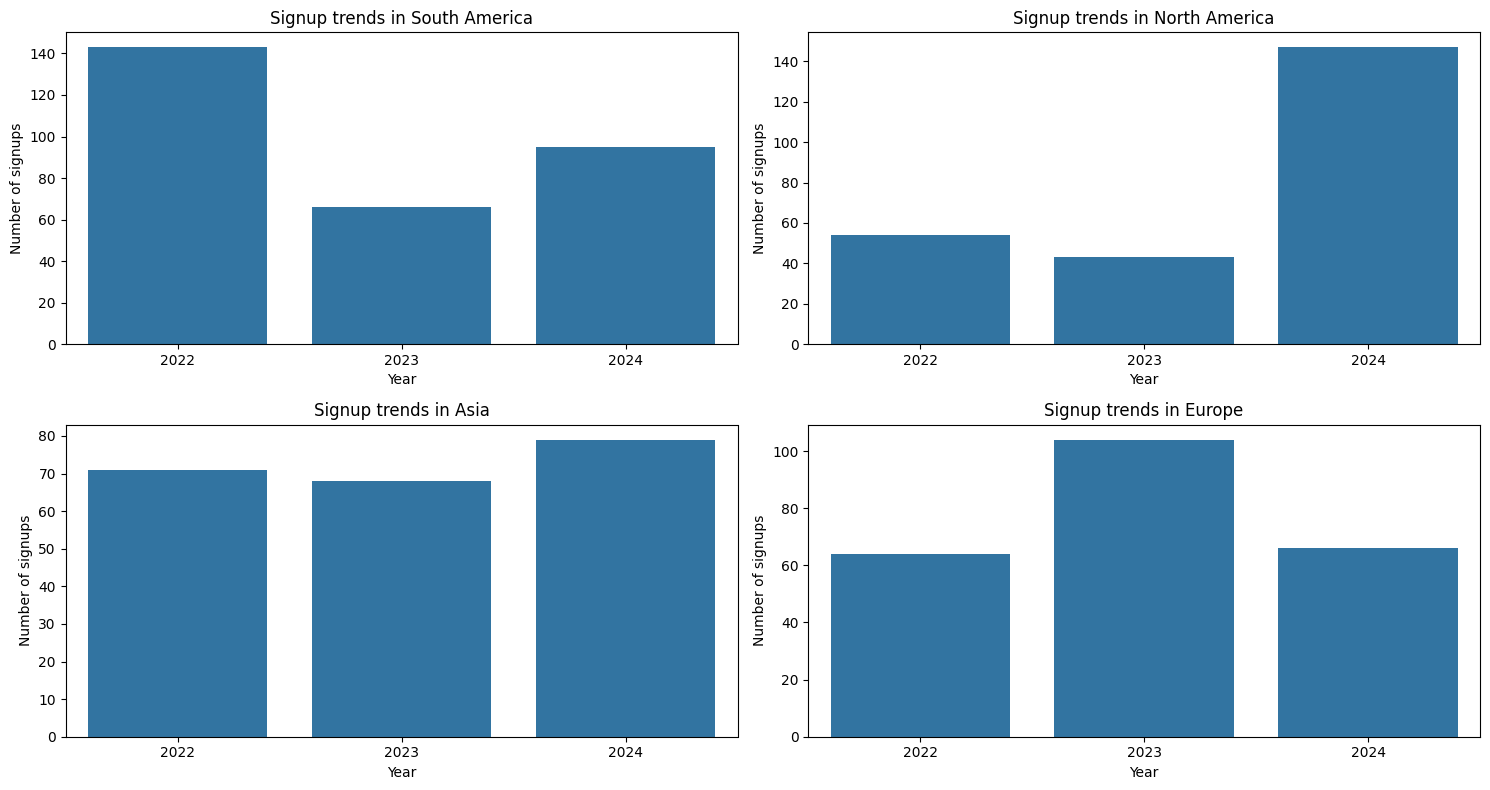

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
continents=['South America', 'North America','Asia','Europe']
for i, continent in enumerate(continents):
  row=i // 2
  col= i % 2
  ax=axes[row,col]

  continent_data=merged_df.loc[merged_df['Region'] == continent]
  x_year=continent_data['SignupDate'].dt.year
  sns.countplot(x=x_year,data=merged_df,ax=ax)
  ax.set_title(f'Signup trends in {continent}')
  ax.set_xlabel('Year')
  ax.set_ylabel('Number of signups')
plt.tight_layout()
plt.show()

## Product Analysis

<ipython-input-82-629b55b8355b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Category', order=merged_df['Category'].value_counts().index,palette='viridis')


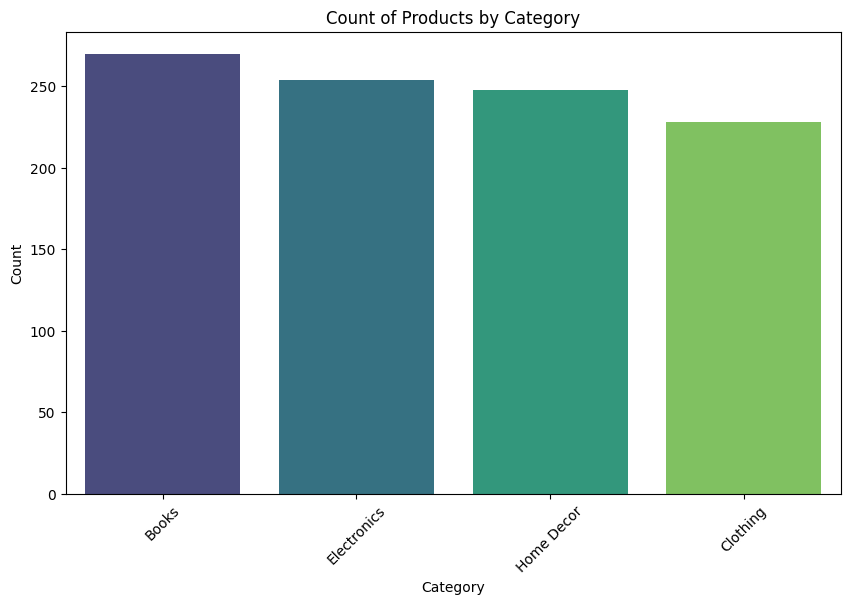

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Category', order=merged_df['Category'].value_counts().index,palette='viridis')
plt.title('Count of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-83-8fc91d64fa89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Category', y='Price',palette='viridis')


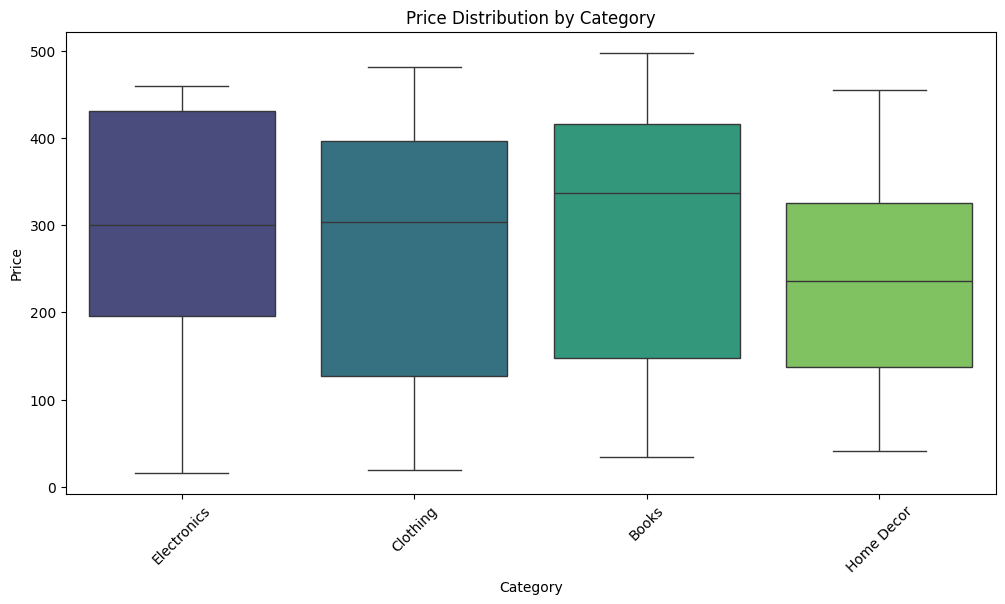

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='Category', y='Price',palette='viridis')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

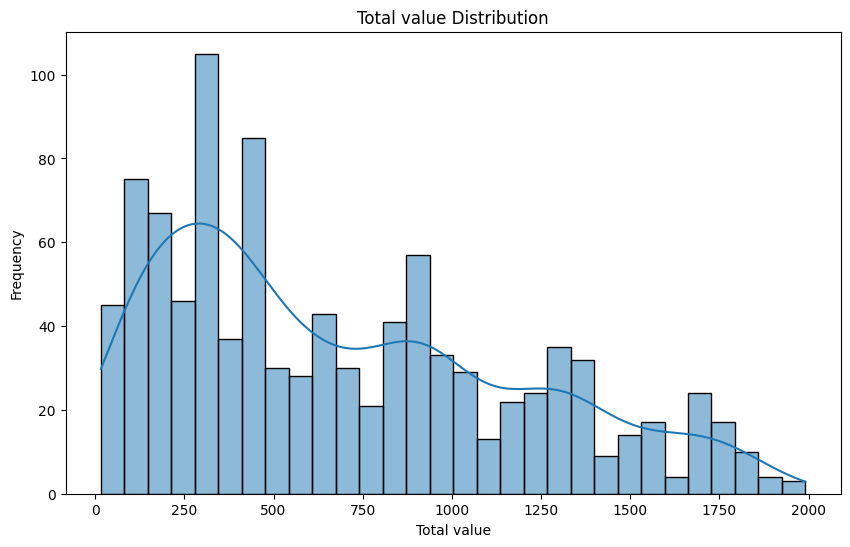

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['TotalValue'], bins=30, kde=True)
plt.title('Total value Distribution')
plt.xlabel('Total value')
plt.ylabel('Frequency')
plt.show()

## Sales analysis - Product

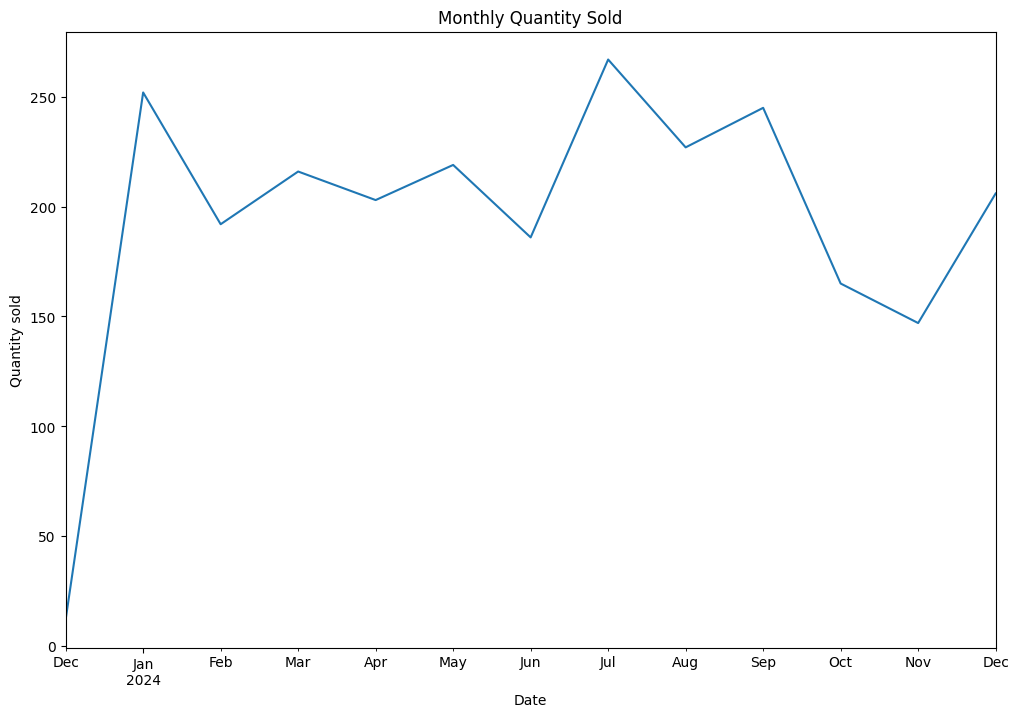

In [ ]:
tr_copy=merged_df.copy()
tr_copy.set_index('TransactionDate',inplace=True)
tr_copy.resample('ME')['Quantity'].sum().plot(figsize=(12,8))
plt.title('Monthly Quantity Sold')
plt.xlabel('Date')
plt.ylabel('Quantity sold')
plt.show()

<ipython-input-86-8445db39cbe1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products.head(10), x='ProductName', y='Quantity', palette='viridis')


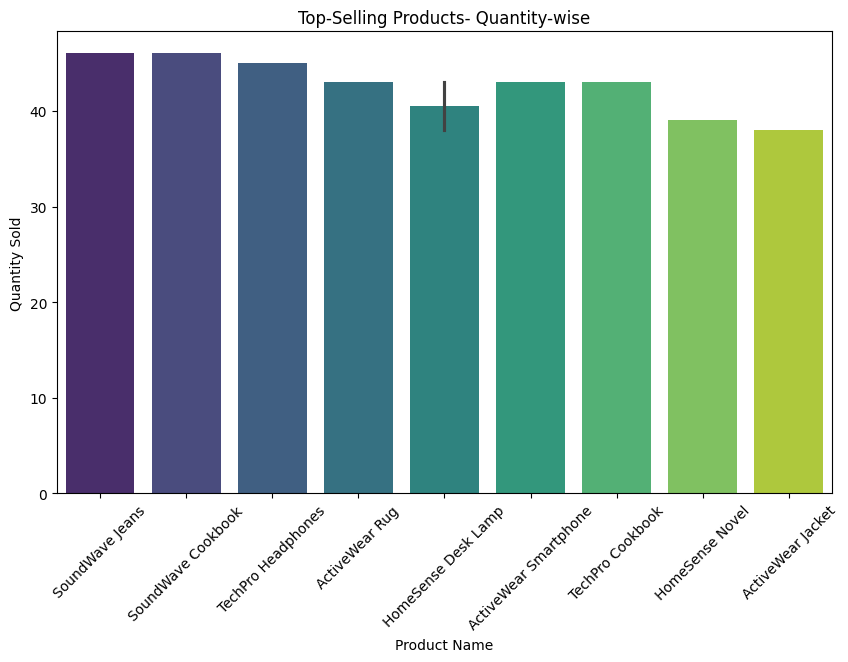

In [ ]:
top_products = merged_df.groupby('ProductID')['Quantity'].sum().reset_index()
top_products = top_products.merge(products, on='ProductID')
top_products = top_products.sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products.head(10), x='ProductName', y='Quantity', palette='viridis')
plt.title('Top-Selling Products- Quantity-wise')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

<ipython-input-87-8218b75bb66f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_products.head(10), x='ProductName', y='Quantity', palette='viridis')


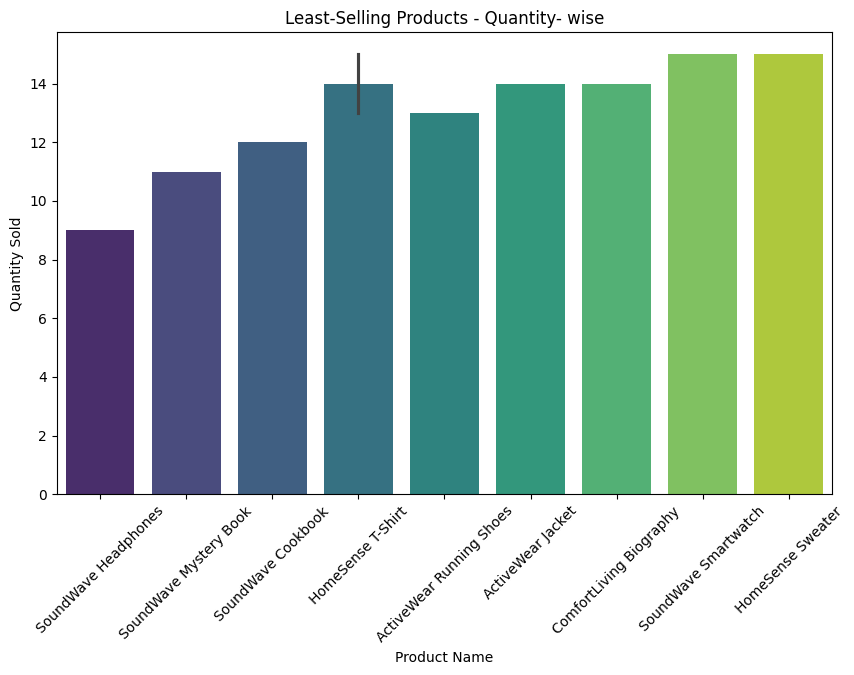

In [ ]:
bottom_products = merged_df.groupby('ProductID')['Quantity'].sum().reset_index()
bottom_products = top_products.merge(products, on='ProductID')
bottom_products = top_products.sort_values(by='Quantity', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_products.head(10), x='ProductName', y='Quantity', palette='viridis')
plt.title('Least-Selling Products - Quantity- wise')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

<ipython-input-88-fc4c63efef56>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_products.head(10), x='ProductName', y='TotalValue', palette='mako')


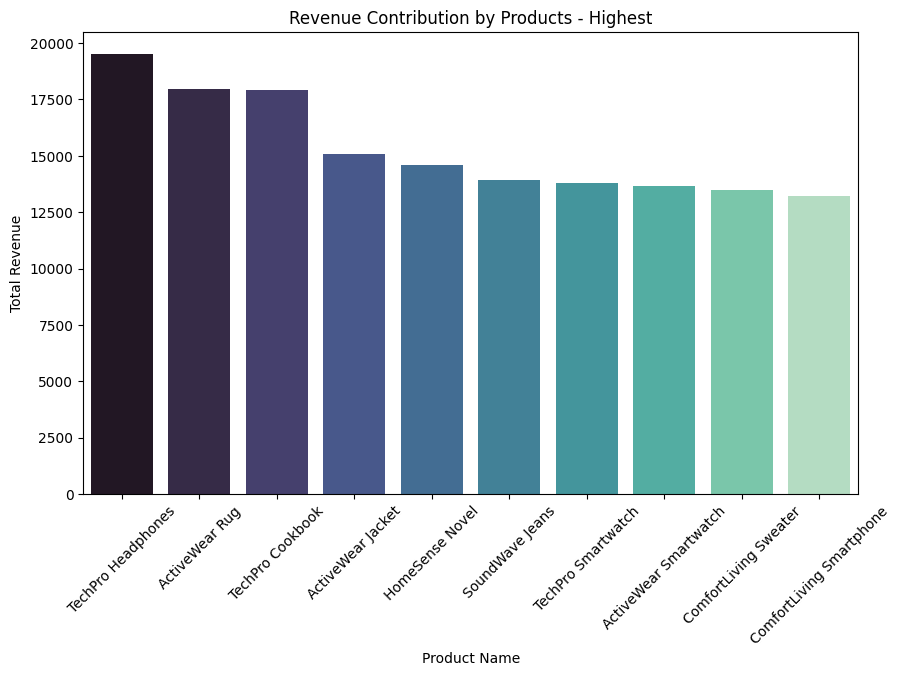

In [ ]:
revenue_products = merged_df.groupby('ProductID')['TotalValue'].sum().reset_index()
revenue_products = revenue_products.merge(products, on='ProductID').sort_values(by='TotalValue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_products.head(10), x='ProductName', y='TotalValue', palette='mako')
plt.title('Revenue Contribution by Products - Highest')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

<ipython-input-89-23806fd79fcb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_products.head(10), x='ProductName', y='TotalValue', palette='mako')


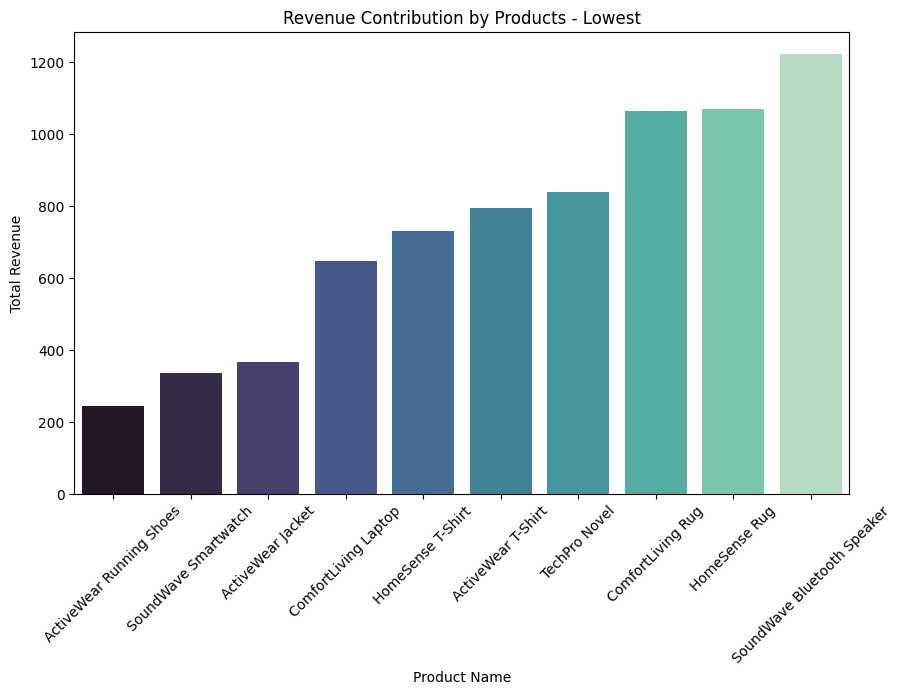

In [ ]:
revenue_products = merged_df.groupby('ProductID')['TotalValue'].sum().reset_index()
revenue_products = revenue_products.merge(products, on='ProductID').sort_values(by='TotalValue', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_products.head(10), x='ProductName', y='TotalValue', palette='mako')
plt.title('Revenue Contribution by Products - Lowest')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

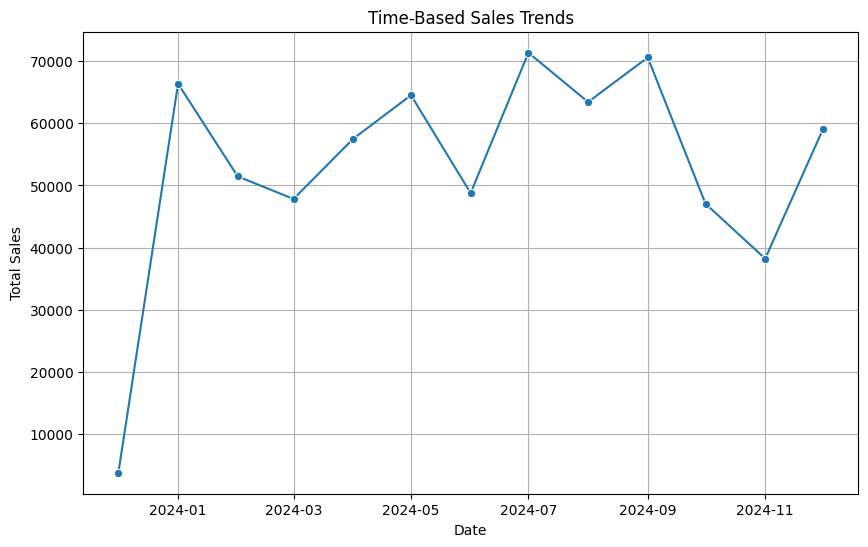

In [ ]:
sales_trends = merged_df.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().reset_index()
sales_trends['TransactionDate'] = sales_trends['TransactionDate'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_trends, x='TransactionDate', y='TotalValue', marker='o')
plt.title('Time-Based Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

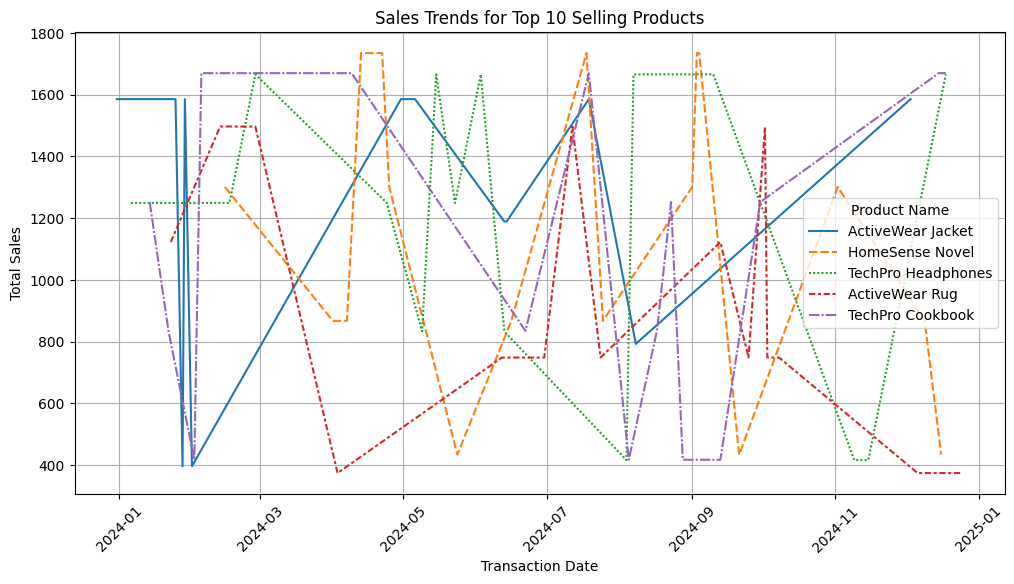

In [ ]:
product_sales = merged_df.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)
top_5_product_ids = product_sales.head(5).index
top_5_df = merged_df[merged_df['ProductID'].isin(top_5_product_ids)]

product_sales_time_series = top_5_df.groupby(['ProductID', 'TransactionDate'])['TotalValue'].sum().reset_index()
product_sales_pivot = product_sales_time_series.pivot_table(index='TransactionDate', columns='ProductID', values='TotalValue')
product_id_to_name_map = dict(zip(top_5_product_ids, top_5_df.loc[top_5_df['ProductID'].isin(top_5_product_ids), 'ProductName'].unique()))
product_sales_pivot = product_sales_pivot.rename(columns=product_id_to_name_map)

plt.figure(figsize=(12, 6))
sns.lineplot(data=product_sales_pivot)
plt.title('Sales Trends for Top 10 Selling Products')
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Name')
plt.grid(True)
plt.show()

## Sales Analysis- Region

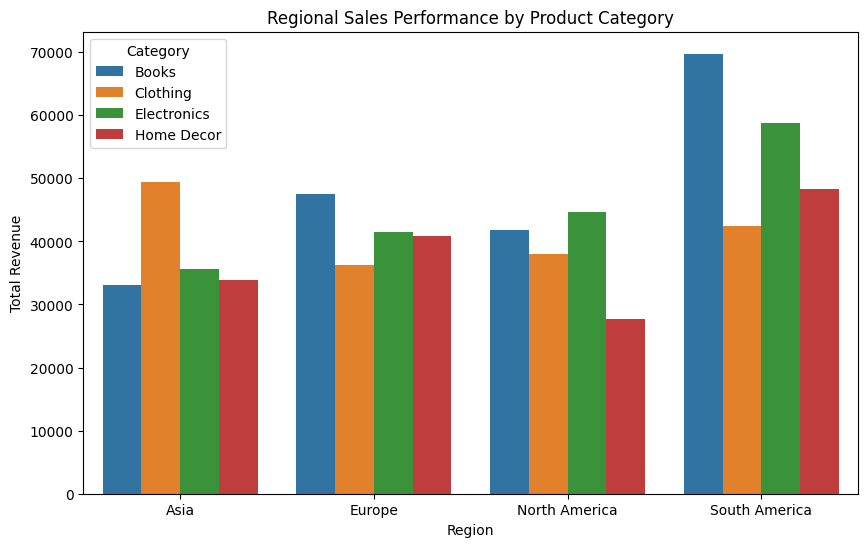

In [ ]:
regional_sales_agg = merged_df.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=regional_sales_agg, x='Region', y='TotalValue', hue='Category', palette='tab10')
plt.title('Regional Sales Performance by Product Category')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Category')
plt.show()

## Sales Analysis- Time

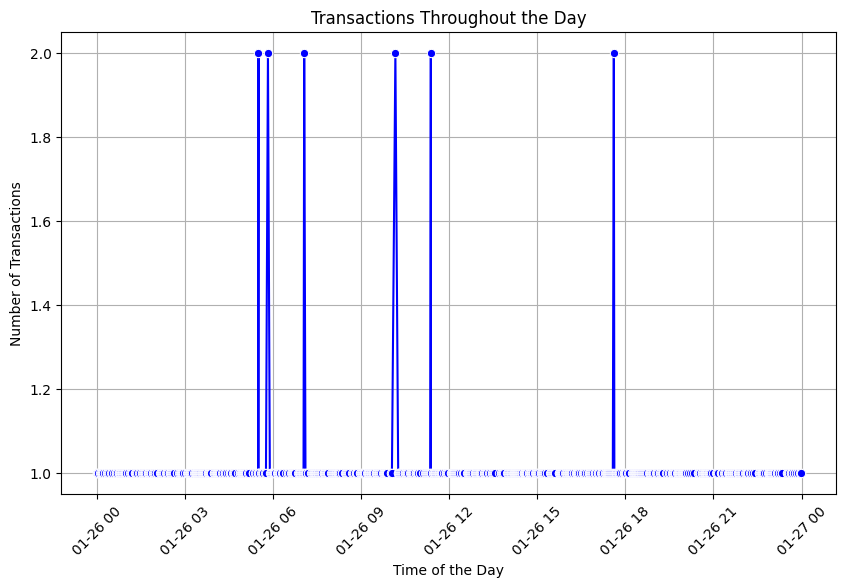

In [ ]:
transactions_by_time = merged_df.groupby('TransactionTime').size().reset_index(name='TransactionCount')
transactions_by_time['TransactionTime'] = pd.to_datetime(transactions_by_time['TransactionTime'], format='%H:%M:%S')
transactions_by_time = transactions_by_time.sort_values(by='TransactionTime')

plt.figure(figsize=(10, 6))
sns.lineplot(data=transactions_by_time, x='TransactionTime', y='TransactionCount', marker='o', color='blue')
plt.title('Transactions Throughout the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid()
plt.show()

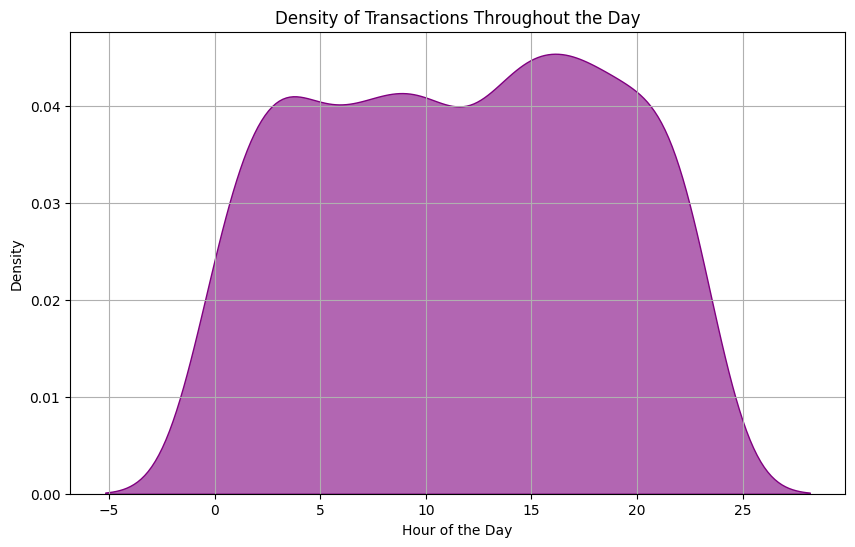

In [ ]:
merged_df['TransactionTime'] = pd.to_datetime(merged_df['TransactionTime'], format='%H:%M:%S')

plt.figure(figsize=(10, 6))
sns.kdeplot(data=merged_df, x=merged_df['TransactionTime'].dt.hour, color='purple', fill=True, alpha=0.6)
plt.title('Density of Transactions Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.grid()
plt.show()


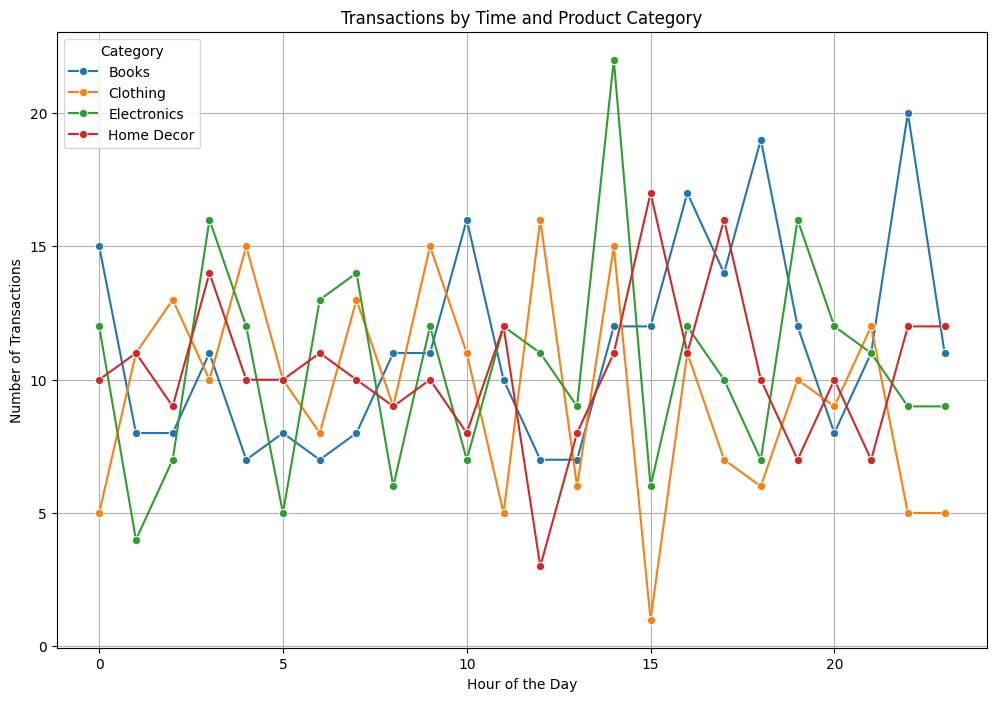

In [ ]:
merged_df['TransactionHour'] = pd.to_datetime(merged_df['TransactionTime'], format='%H:%M:%S').dt.hour
category_time_data = merged_df.groupby(['Category', 'TransactionHour']).size().reset_index(name='TransactionCount')

plt.figure(figsize=(12, 8))
sns.lineplot(data=category_time_data, x='TransactionHour', y='TransactionCount', hue='Category', marker='o')
plt.title('Transactions by Time and Product Category')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Category')
plt.grid()
plt.show()

<ipython-input-96-77ae7badb979>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_hour, x='TransactionHour', y='TotalValue', palette='mako')


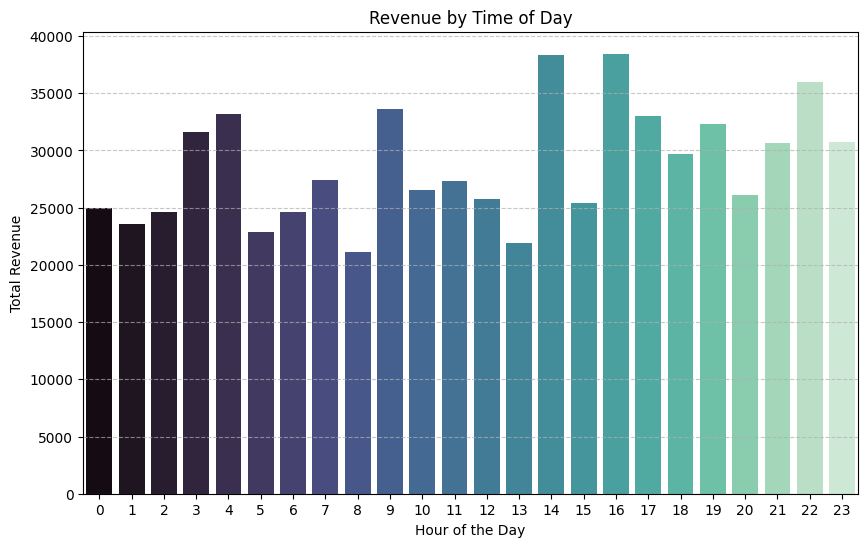

In [ ]:
merged_df['TransactionHour'] = pd.to_datetime(merged_df['TransactionTime'], format='%H:%M:%S').dt.hour
revenue_by_hour = merged_df.groupby('TransactionHour')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_hour, x='TransactionHour', y='TotalValue', palette='mako')
plt.title('Revenue by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-97-a57e6b2a914a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transactions_by_day, x='DayOfWeek', y='TransactionCount', palette='Blues_d')


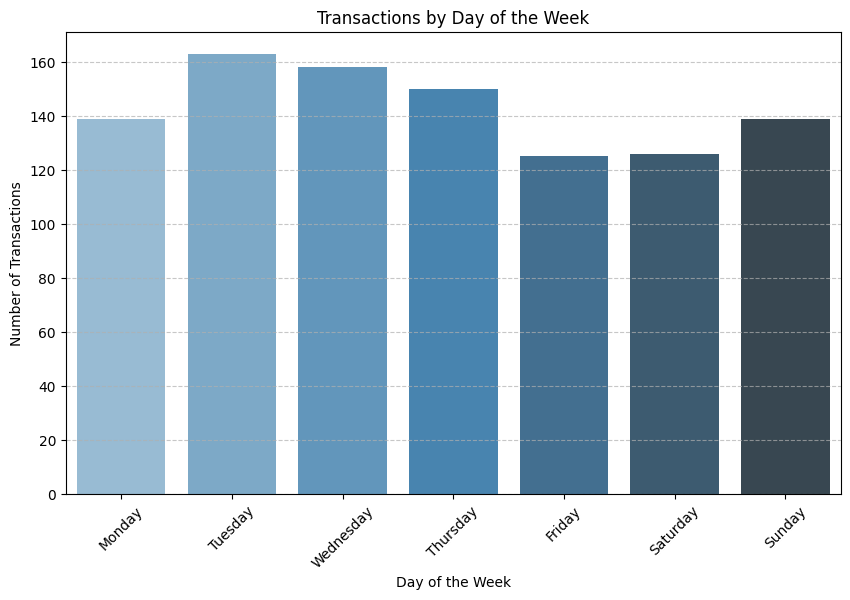

In [ ]:
merged_df['DayOfWeek'] = merged_df['TransactionDate'].dt.day_name()

transactions_by_day = merged_df.groupby('DayOfWeek').size().reset_index(name='TransactionCount')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transactions_by_day['DayOfWeek'] = pd.Categorical(transactions_by_day['DayOfWeek'], categories=day_order, ordered=True)
transactions_by_day = transactions_by_day.sort_values('DayOfWeek')

plt.figure(figsize=(10, 6))
sns.barplot(data=transactions_by_day, x='DayOfWeek', y='TransactionCount', palette='Blues_d')
plt.title('Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

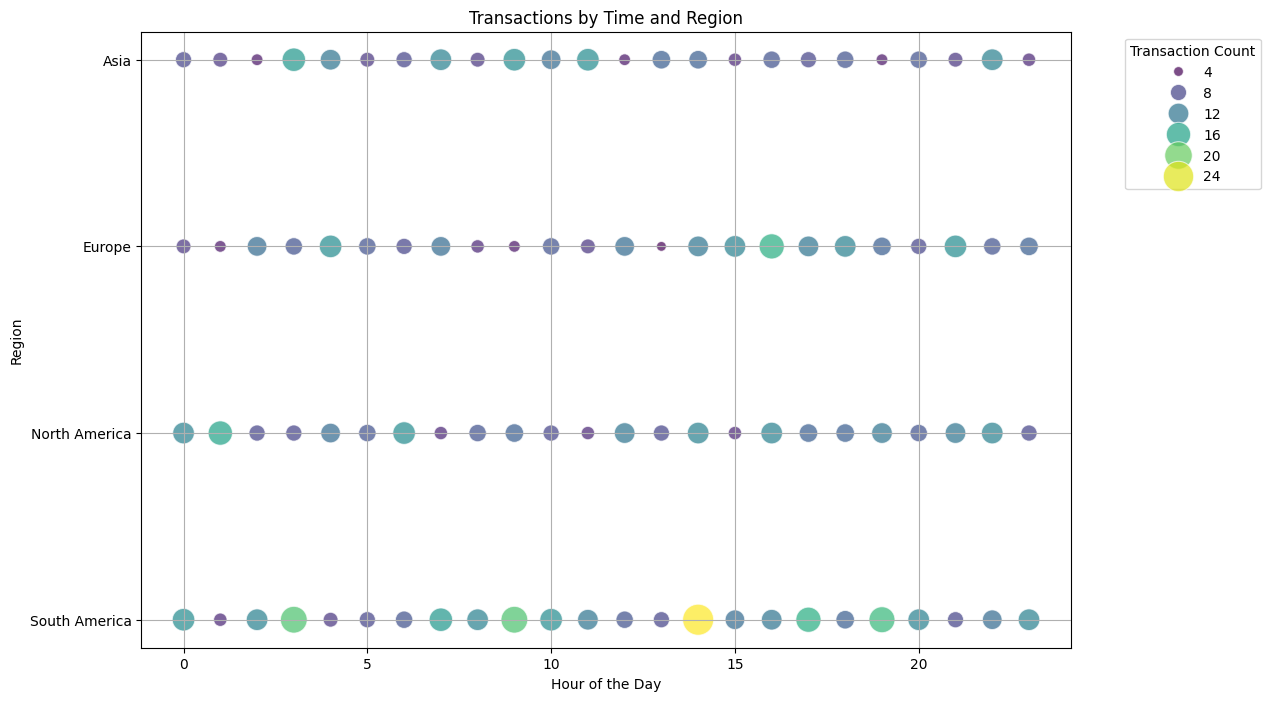

In [ ]:
bubble_data = merged_df.groupby(['Region', 'TransactionHour']).size().reset_index(name='TransactionCount')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=bubble_data, x='TransactionHour', y='Region', size='TransactionCount', hue='TransactionCount', sizes=(50, 500), palette='viridis', alpha=0.7)
plt.title('Transactions by Time and Region')
plt.xlabel('Hour of the Day')
plt.ylabel('Region')
plt.legend(title='Transaction Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


## Score-system

### Demand Score

In [ ]:
product_demand = merged_df.groupby('ProductID')['Quantity'].sum().reset_index()
product_demand.rename(columns={'Quantity': 'TotalDemand'}, inplace=True)
scaler = MinMaxScaler()
product_demand['DemandScore'] = scaler.fit_transform(product_demand[['TotalDemand']])
product_demand = product_demand.merge(products[['ProductID', 'ProductName']], on='ProductID', how='left')
merged_df = merged_df.merge(product_demand[['ProductID', 'DemandScore']], on='ProductID', how='left')

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
product_demand['DemandScoreRange'] = pd.cut(product_demand['DemandScore'], bins=bins, labels=labels, include_lowest=True)

demand_score_distribution = product_demand['DemandScoreRange'].value_counts().reset_index()
demand_score_distribution.columns = ['DemandScoreRange', 'ProductCount']

fig = px.pie(
    demand_score_distribution,
    values='ProductCount',
    names='DemandScoreRange',
    title='Proportion of Products by Demand Score Range',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.show()

### Selling Score


In [ ]:
product_quantities = merged_df.groupby('ProductID')['Quantity'].sum().reset_index()
min_quantity = product_quantities['Quantity'].min()
max_quantity = product_quantities['Quantity'].max()
product_quantities['SellingScore'] = 100 * (product_quantities['Quantity'] - min_quantity) / (max_quantity - min_quantity)

In [ ]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column for score ranges
product_quantities['ScoreRange'] = pd.cut(product_quantities['SellingScore'], bins=bins, labels=labels)

# Count the number of products in each score range
score_range_counts = product_quantities['ScoreRange'].value_counts()

# Create the Plotly pie chart
fig = px.pie(score_range_counts,
             values=score_range_counts.values,
             names=score_range_counts.index,
             title="Product Selling Score Distribution",
             hover_data=[score_range_counts.values],
             labels={'value': 'Number of Products'},
             color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Revenue Score - Product

In [ ]:
product_revenue = merged_df.groupby('ProductID')['TotalValue'].sum().reset_index()
product_revenue.rename(columns={'TotalValue': 'TotalRevenue'}, inplace=True)
product_revenue['RevenueScore'] = MinMaxScaler().fit_transform(product_revenue[['TotalRevenue']])
merged_df = merged_df.merge(product_revenue[['ProductID', 'TotalRevenue', 'RevenueScore']], on='ProductID', how='left')

### Revenue Score- Customer

In [ ]:
customer_revenue = merged_df.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_revenue.rename(columns={'TotalValue': 'TotalSpending'}, inplace=True)
customer_revenue['CustomerTier'] = pd.qcut(customer_revenue['TotalSpending'], q=4, labels=['Low', 'Medium', 'High', 'VIP'])
merged_df = merged_df.merge(customer_revenue[['CustomerID', 'CustomerTier']], on='CustomerID', how='left')

### Scores- visualization

In [ ]:
product_metrics = merged_df.groupby('ProductID').agg(
    TotalDemand=('Quantity', 'sum'),
    TotalRevenue=('TotalValue', 'sum')
).reset_index()

scaler = MinMaxScaler()
product_metrics[['NormalizedDemand', 'NormalizedRevenue']] = scaler.fit_transform(
    product_metrics[['TotalDemand', 'TotalRevenue']]
)

product_metrics['CompositeScore'] = 0.5 * product_metrics['NormalizedDemand'] + \
                                    0.5 * product_metrics['NormalizedRevenue']

product_metrics = product_metrics.merge(products[['ProductID', 'ProductName', 'Category']], on='ProductID', how='left')


In [ ]:
def plot_score_pie_chart(data, score_column, title):
    bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

    data[f'{score_column}Range'] = pd.cut(data[score_column], bins=bins, labels=labels, include_lowest=True)

    score_distribution = data[f'{score_column}Range'].value_counts().reset_index()
    score_distribution.columns = [f'{score_column}Range', 'ProductCount']

    fig = px.pie(
        score_distribution,
        values='ProductCount',
        names=f'{score_column}Range',
        title=title,
        color_discrete_sequence=px.colors.sequential.Viridis
    )

    fig.show()

plot_score_pie_chart(product_metrics, score_column='NormalizedRevenue', title='Proportion of Products by Revenue Score Range')
plot_score_pie_chart(product_metrics, score_column='CompositeScore', title='Proportion of Products by Composite Score Range')


## Customer Segmentation

In [ ]:
customer_tier_counts = customer_revenue['CustomerTier'].value_counts()
fig = px.pie(customer_tier_counts,
             values=customer_tier_counts.values,
             names=customer_tier_counts.index,
             title="Customer Segmentation by Spending Tier",
             hover_data=[customer_tier_counts.values],
             labels={'value': 'Number of Customers'},
             color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Customer Retention Analysis

In [ ]:
customer_transactions = merged_df.groupby('CustomerID').size().reset_index(name='TransactionCount')

customer_transactions['HighValueCustomer'] = customer_transactions['TransactionCount'] > 7
customer_transactions['OccasionalCustomer'] = customer_transactions['TransactionCount'] > 3
customer_transactions['ChurnedCustomer'] = customer_transactions['TransactionCount'] < 3

repeat_rate_hv = customer_transactions['HighValueCustomer'].mean() * 100
repeat_rate_occ = customer_transactions['OccasionalCustomer'].mean() * 100
repeat_rate_ch = customer_transactions['ChurnedCustomer'].mean() * 100
print(f"Repeat Customer Rate (High Value customer): {repeat_rate_hv:.2f}%")
print(f"Repeat Customer Rate (Occasioanl customer): {repeat_rate_occ:.2f}%")
print(f"Repeat Customer Rate (Churned customer): {repeat_rate_ch:.2f}%")

Repeat Customer Rate (High Value customer): 15.58%
Repeat Customer Rate (Occasioanl customer): 73.87%
Repeat Customer Rate (Churned customer): 10.55%


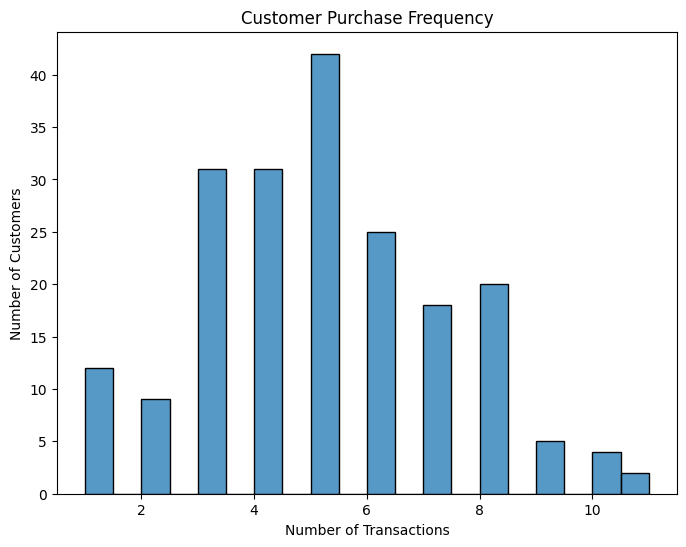

In [ ]:
customer_frequency = transactions.groupby('CustomerID')['TransactionID'].count()

plt.figure(figsize=(8, 6))
sns.histplot(customer_frequency, bins=20)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

## Price Elasticity Analysis

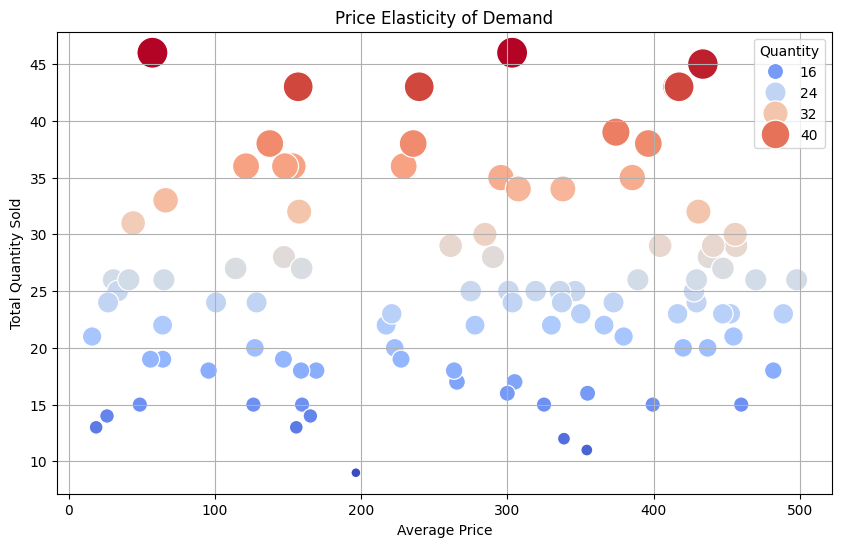

In [ ]:
price_demand = merged_df.groupby('ProductID').agg({'Price': 'mean', 'Quantity': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=price_demand, x='Price', y='Quantity', size='Quantity', hue='Quantity', palette='coolwarm', sizes=(50, 500))
plt.title('Price Elasticity of Demand')
plt.xlabel('Average Price')
plt.ylabel('Total Quantity Sold')
plt.grid()
plt.show()

In [ ]:
merged_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'TransactionTime', 'CustomerName',
       'Region', 'SignupDate', 'Continent', 'ProductName', 'Category',
       'TransactionHour', 'DayOfWeek', 'DemandScore', 'TotalRevenue',
       'RevenueScore', 'CustomerTier'],
      dtype='object')